In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
calendar = pd.read_csv('../bi_airbnb/data/calendar.csv')
listing_c = pd.read_csv('../bi_airbnb/data/listings.csv')
voisin_c = pd.read_csv('../bi_airbnb/data/neighbourhoods.csv')
review_c = pd.read_csv('../bi_airbnb/data/reviews.csv')

# **CALENDAR**

In [3]:
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,55239,2021-04-15,f,$430.00,$421.00,2.0,1125.0
1,11213,2021-04-16,t,$170.00,$170.00,1.0,730.0
2,11213,2021-04-17,t,$170.00,$170.00,1.0,730.0
3,11213,2021-04-18,t,$170.00,$170.00,1.0,730.0
4,11213,2021-04-19,t,$170.00,$170.00,1.0,730.0
5,11213,2021-04-20,t,$170.00,$170.00,1.0,730.0
6,11213,2021-04-21,t,$170.00,$170.00,1.0,730.0
7,11213,2021-04-22,t,$170.00,$170.00,1.0,730.0
8,11213,2021-04-23,t,$170.00,$170.00,1.0,730.0
9,11213,2021-04-24,t,$170.00,$170.00,1.0,730.0


Par chance, toutes les dates sont présentes donc je m'en occupe pas. 

In [4]:
pm_value = calendar.isnull().sum().sort_values(ascending = False) * 100 / len(calendar)
print(pm_value)

maximum_nights    0.045833
minimum_nights    0.045833
adjusted_price    0.007771
price             0.007771
available         0.000000
date              0.000000
listing_id        0.000000
dtype: float64


Je vais combler les valeurs nulles par la valeur la plus fréquente pour price adjusted_price minimu_night maximum_night

In [5]:
calendar['minimum_nights'] = calendar['minimum_nights'].fillna(calendar['minimum_nights'].mode().iloc[0])

In [6]:
calendar['maximum_nights'] = calendar['maximum_nights'].fillna(calendar['maximum_nights'].mode().iloc[0])

In [7]:
calendar['adjusted_price'] = calendar['adjusted_price'].fillna(calendar['adjusted_price'].mode().iloc[0])

In [8]:
calendar['price'] = calendar['price'].fillna(calendar['price'].mode().iloc[0])

In [9]:
pm_value = calendar.isnull().sum().sort_values(ascending = False) * 100 / len(calendar)
print(pm_value)

maximum_nights    0.0
minimum_nights    0.0
adjusted_price    0.0
price             0.0
available         0.0
date              0.0
listing_id        0.0
dtype: float64


In [10]:
calendar['price'] = calendar['price'].replace('[$,]', '', regex=True).astype(float)

In [11]:
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)

# ****REVIEW****

* listing_id - ID du logement
* id - ID de l'enregistrement
* date - date du commentaire
* reviewer_id - ID de l'utilisateur qui commente
* reviewer_name - nom du commentateur
* comments _ présence ou non d'un commentaire

In [12]:
pm_value = review_c.isnull().sum().sort_values(ascending = False) * 100 / len(review_c)
print(pm_value)

comments         0.047039
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64


In [13]:
review_c.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...
1,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
2,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
3,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
4,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
5,3109,234257457,2018-02-12,3539452,Dominique,The host canceled this reservation 8 days befo...
6,3109,295840159,2018-07-24,7415343,Laurent,"Appartement spacieux, propre,clair, et calme à..."
7,3109,297207211,2018-07-27,202957965,Eleonora,The host canceled this reservation 2 days befo...
8,3109,360052439,2018-12-19,13723090,Marc,The host canceled this reservation 15 days bef...
9,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état..."


Je remplace les commentaires par True or False pour simplifier le traitement des données 

In [14]:
review_c['comments'] = pd.notnull(review_c['comments'])

In [15]:
review_c.shape

(1184124, 6)

In [16]:
# review_c['comments'] = review_c['comments'].fillna("Sans commentaire")

In [17]:
review_c = review_c.drop(columns=['id', 'reviewer_name', 'date' ])

# **LISTING**

In [18]:
listing_c.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20210410122610,2021-04-14,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",within a day,50%,67%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86957,2.36127,Entire loft,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Essentials"", ""Kitchen"", ""Heating"", ""Host gre...",$125.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,12,286,2021-04-14,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20210410122610,2021-04-13,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,within a day,80%,0%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83191,2.31870,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Smoke alarm"", ""Dishes and silverware"", ""Hair...",$60.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,365,2021-04-13,9,0,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.17
2,5396,https://www.airbnb.com/rooms/5396,20210410122610,2021-04-16,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",We are both journalists based in the Middle Ea...,within an hour,100%,92%,f,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Paris, Ile-de-France, France",Hôtel-de-Ville,NaN,48.85247,2.35835,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Essentials"", ""TV with standard cable"", ""Dish...",$47.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,18,47,58,58,2021-04-16,237,17,3,2009-06-30,2021-04-12,90.0,9.0,9.0,10.0,10.0,10.0,9.0,7510402838018,f,1,1,0,0,1.65
3,7397,https://www.airbnb.

In [19]:
pm_value = listing_c.isnull().sum().sort_values(ascending = False) * 100 / len(listing_c)
pm_value

bathrooms                                       100.000000
neighbourhood_group_cleansed                    100.000000
calendar_updated                                100.000000
license                                          66.284673
host_response_time                               65.317800
host_response_rate                               65.317800
host_acceptance_rate                             58.687589
host_about                                       51.195118
neighborhood_overview                            40.586464
neighbourhood                                    40.586464
review_scores_location                           26.176890
review_scores_checkin                            26.175305
review_scores_value                              26.173720
review_scores_accuracy                           26.149945
review_scores_communication                      26.145189
review_scores_cleanliness                        26.135679
review_scores_rating                             26.0722

Je supprime les colonnes où la valeur manquante est supérieure à 70%

In [20]:
listing_c = listing_c.dropna(axis=1,thresh=len(listing_c)*0.7)

In [21]:
# # Program to visualize missing values in dataset
  
# # Importing the libraries
# import pandas as pd
# import missingno as msno

# msno.bar(df, labels=True);

<Figure size 1440x1440 with 0 Axes>

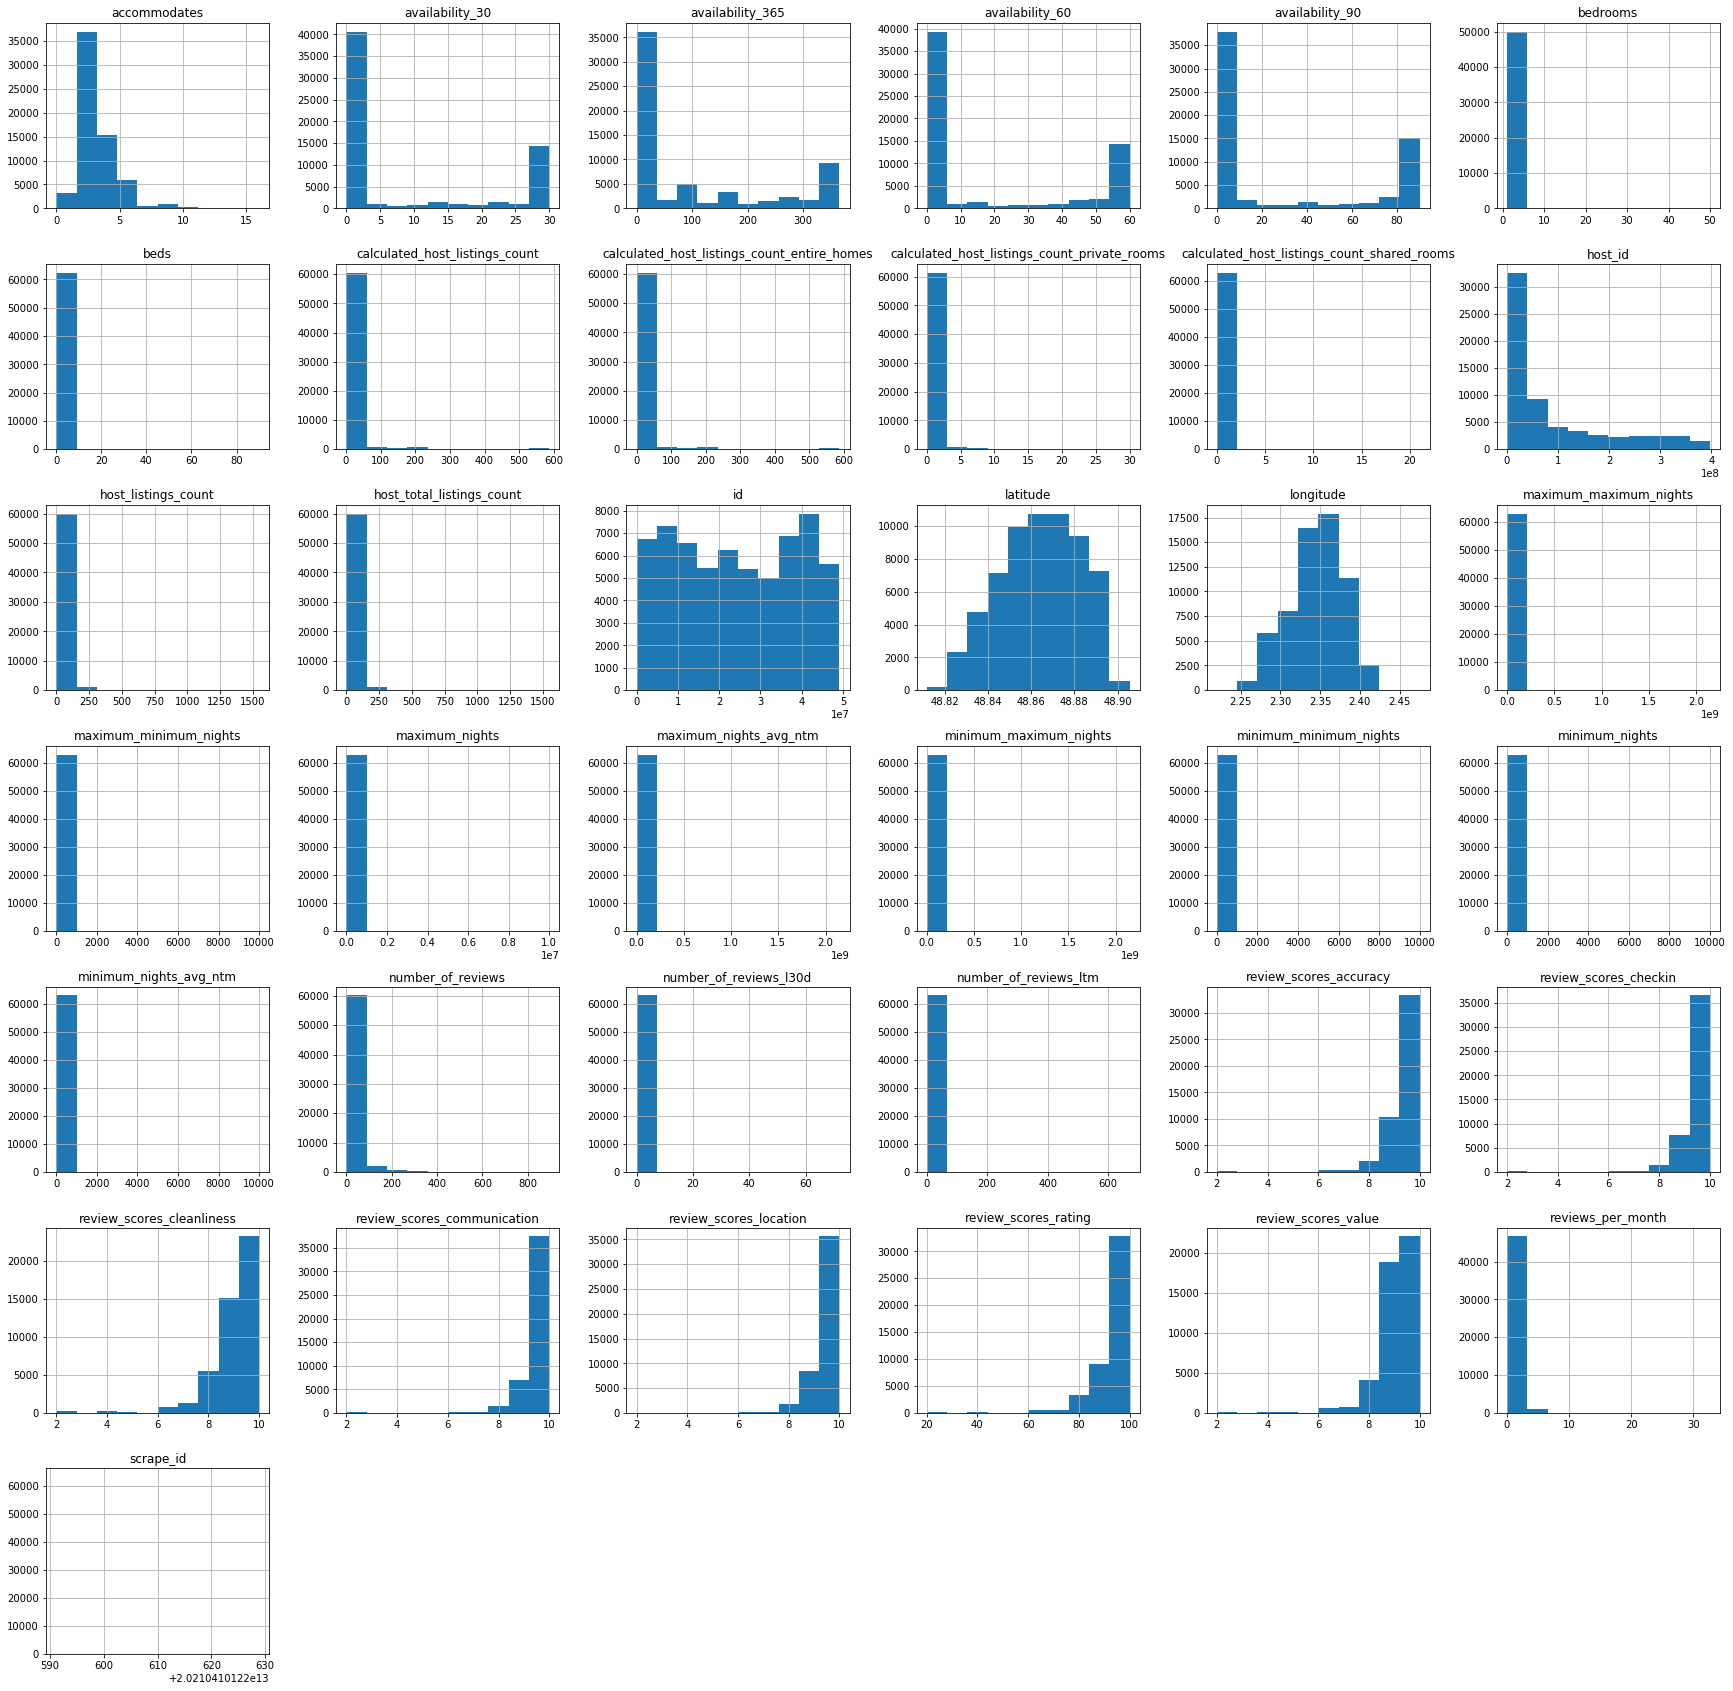

In [22]:
plt.figure(figsize=(20,20));
listing_c.hist(figsize=(30, 30));

Avec les histogrammes je me rends compte que beaucoup de colonnes se répètent et se ressemblent. Elles semblent également toutes corellées. Je vais donc trier l'ensemble de mes colonnes pour ne garder que les plus significatives.

In [23]:
listing_c['picture_url'] = listing_c['picture_url'].fillna(listing_c['picture_url'].mode().iloc[0])

Pas mal de colonnes sont liées à Host_name. C'est aberrant que host_name soit manquant donc je supprime les ligne où le nom de l'hôte est absent et je supprime de la même manière les valeurs manquantes d'autres colonnes dont le pourcentage de valeurs manquantes était le même.

* DELETE if missing
* host_name
* host_location
* host_neighbourhood

In [24]:
listing_c=listing_c.dropna(subset = ['host_name', 'host_neighbourhood', 'host_location'])

Je drop toutes les colonnes qui me semblent servir à rien

*     DROP COLUMNS
*     id
*     beds
*     scrape_id
*     last_scraped
*     host url
*     listing_url
*     bathrooms_texte
*     availability_30
*     availability_60
*     availability_90 
* maximum_nights
* minimum_nights

In [25]:
listing_c = listing_c.drop(columns=["first_review", "beds", "id", "scrape_id", "last_scraped", "host_url", "listing_url", "bathrooms_text", "availability_30", "availability_60","availability_90"])

* J'ai décidé de garder le minimum et le maximum de nuits moyenne
* "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"

In [26]:
listing_c = listing_c.drop(columns=["minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"])

Je supprime ces colonnes. Je garde le nombre total de commentaires. number_of_reviews_ltm 	number_of_reviews_l30d 	

In [27]:
listing_c = listing_c.drop(columns=["number_of_reviews_ltm","number_of_reviews_l30d"])

In [28]:
listing_c = listing_c.drop(columns=["review_scores_rating", "review_scores_accuracy", "review_scores_checkin", "calendar_last_scraped", "review_scores_value", "amenities", "room_type", "host_verifications", "host_total_listings_count", "neighbourhood_cleansed", "host_thumbnail_url", "host_name"])

In [29]:
listing_c = listing_c.drop(columns=['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'accommodates', 'has_availability'])

Je remplace pas mal de valeurs texte et url par true or false car selon moi, le seul intérêts à les avoir est de savoir si ils sont présents ou non.

* REPLACE BY True or false
* name
* picture_url
* description
* host_picutre_url
* has_availability 

In [30]:
listing_c['name'] = pd.notnull(listing_c['name'])
listing_c['picture_url'] = pd.notnull(listing_c['picture_url'])
listing_c['description'] = pd.notnull(listing_c['description'])
listing_c['host_picture_url'] = pd.notnull(listing_c['host_picture_url'])
listing_c['last_review'] = pd.notnull(listing_c['last_review'])

* REPLACE BY mean() for missing value
* review_per_month
* review_scores_location
* review_scores_checkin
* review_scores_value
* review_scores_accuracy
* review_scores_communication
* review_scores_cleanliness
* review_scores_rating 

In [31]:
listing_c['reviews_per_month'].fillna((listing_c['reviews_per_month'].mean()), inplace=True)
listing_c['review_scores_location'].fillna((listing_c['review_scores_location'].mean()), inplace=True)
listing_c['review_scores_communication'].fillna((listing_c['review_scores_communication'].mean()), inplace=True)
listing_c['review_scores_cleanliness'].fillna((listing_c['review_scores_cleanliness'].mean()), inplace=True)

J'avais peur qu'il n'y ait que des 0 et auquel cas j'aurais supprimé la colonne

* VERIFY unique value
* calculated_host_listings_count
* calculated_host_listings_count_entire_homes
* calculated_host_listings_count_private_rooms
* calculated_host_listings_count_shared_rooms 

* Aucune valeur nulle donc pas besoin
* 
* REPLACE BY MODE()
* host_is_superhost
* host_identity_verified 
* host_has_profile_pic 
* maximum_nights_avg_ntm
* has_availability 
* availability_365 	

In [32]:
listing_c['bedrooms'] = listing_c['bedrooms'].fillna(listing_c['bedrooms'].mode().iloc[0])

Je nettoie price et le transforme en float

In [33]:
listing_c['price'] = listing_c['price'].replace('[$,]', '', regex=True).astype(float)

# **JE TRAITE LES VALEURS ABBERRANTES DE LISTING**

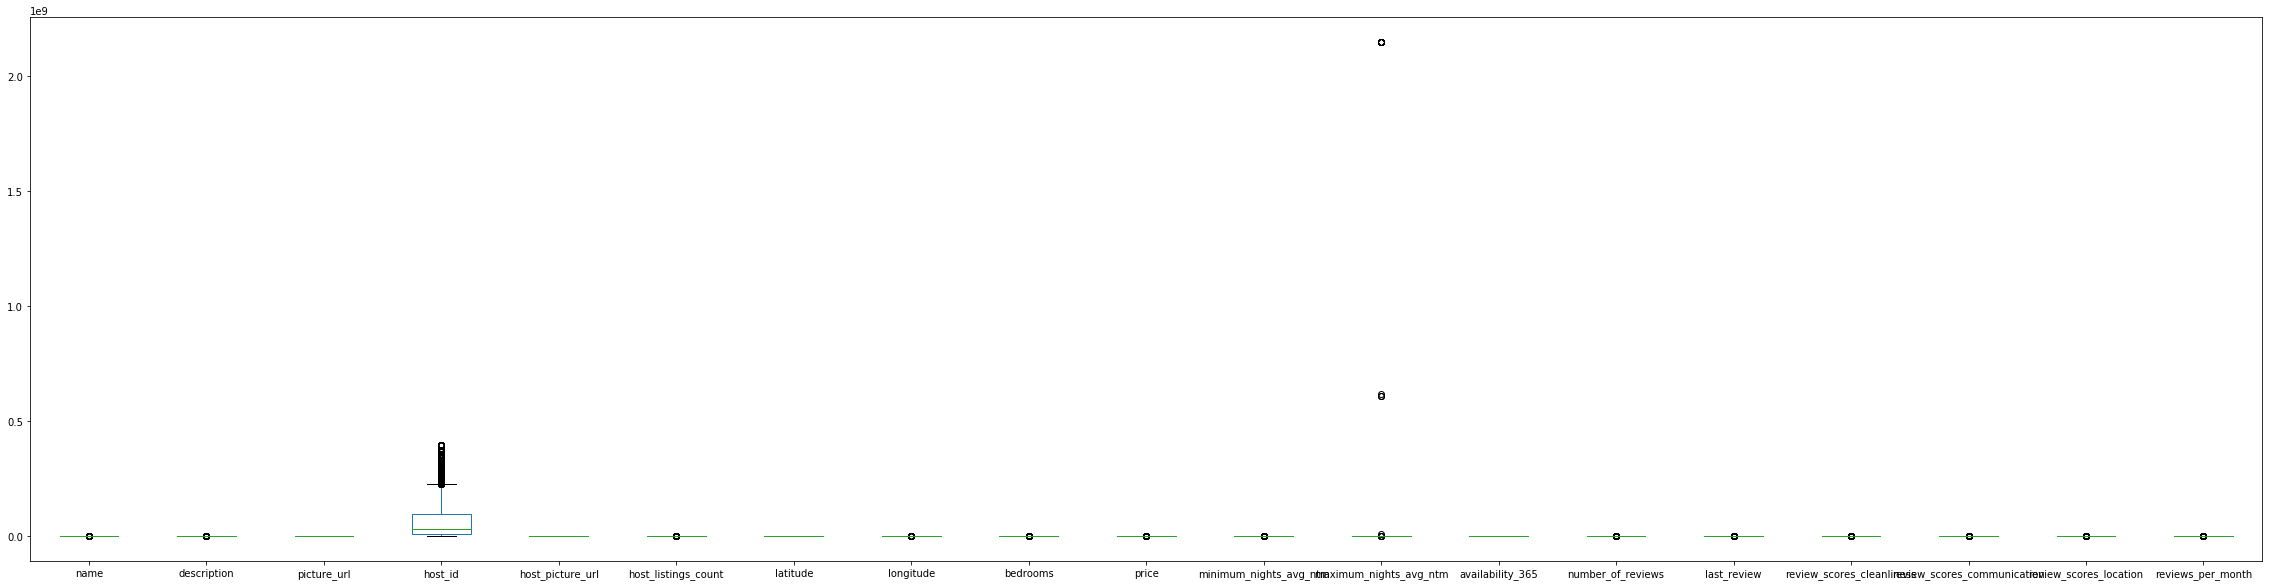

In [34]:
boxplot = listing_c.boxplot(grid=False, fontsize=10, figsize=(40, 10), showfliers=True)

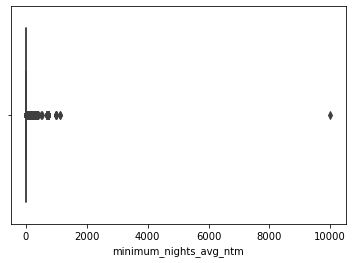

In [35]:
ax = sns.boxplot(x=listing_c['minimum_nights_avg_ntm'])

In [36]:
listing_c = listing_c[(listing_c['minimum_nights_avg_ntm'] >= 1) & (listing_c['minimum_nights_avg_ntm'] <= 10)]

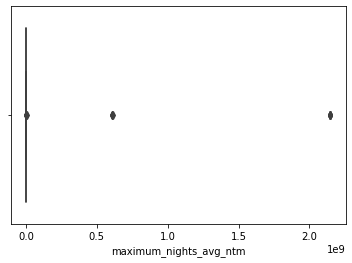

In [37]:
ax = sns.boxplot(x=listing_c['maximum_nights_avg_ntm'])

In [38]:
listing_c = listing_c[(listing_c['maximum_nights_avg_ntm'] >= 1) & (listing_c['maximum_nights_avg_ntm'] <= 365)]

# Je m'occupe du nombre d'années des hôtes. Je veux juste garder le nombre d'années

In [39]:
import datetime 
listing_c['host_since'] = pd.to_datetime(listing_c['host_since'])
listing_c['host_since'] = pd.DatetimeIndex(listing_c['host_since']).year
listing_c['host_since'].head()

1     2008
3     2008
4     2009
11    2009
12    2009
Name: host_since, dtype: int64

In [40]:
listing_c['anciennete']  = 2021 - listing_c['host_since'] 
listing_c['anciennete'].head(5)

1     13
3     13
4     12
11    12
12    12
Name: anciennete, dtype: int64

In [41]:
listing_c = listing_c.drop(columns=["host_since"])

# **JE RENOMME CERTAINES COLONNES DE LISTING**

In [42]:
#Je renomme mes colonnes
listing_c = listing_c.rename(columns={'name': 'nom_logement', 'picture_url': 'img_logement', 'host_is_superhost': 'superhost','host_picture_url': 'host_img', 'host_location': 'host_residence', 'host_listings_count': 'nb_lgt_en_location', 'bedrooms': 'nb_bedroom', 'minimum_nights_avg_ntm': 'min_nuit', 'maximum_nights_avg_ntm': 'max_nuit', 'availability_365': 'disponibilite_sur_annee'})

# **VOISIN**

Je supprime neighbourhood_group car il y a 0 valeurs

In [43]:
pm_value = voisin_c.isnull().sum().sort_values(ascending = False) * 100 / len(voisin_c)
print(pm_value)

neighbourhood_group    100.0
neighbourhood            0.0
dtype: float64


In [44]:
voisin_c = voisin_c.drop(columns=["neighbourhood_group"])

# **VISUALISATION** **+ CHOIX DES INDICATEURS**

In [45]:
listing_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15381 entries, 1 to 63079
Data columns (total 27 columns):
nom_logement                   15381 non-null bool
description                    15381 non-null bool
img_logement                   15381 non-null bool
host_id                        15381 non-null int64
host_residence                 15381 non-null object
superhost                      15381 non-null object
host_img                       15381 non-null bool
host_neighbourhood             15381 non-null object
nb_lgt_en_location             15381 non-null float64
host_has_profile_pic           15381 non-null object
host_identity_verified         15381 non-null object
latitude                       15381 non-null float64
longitude                      15381 non-null float64
property_type                  15381 non-null object
nb_bedroom                     15381 non-null float64
price                          15381 non-null float64
min_nuit                       15381 non-null f

In [46]:
review_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184124 entries, 0 to 1184123
Data columns (total 3 columns):
listing_id     1184124 non-null int64
reviewer_id    1184124 non-null int64
comments       1184124 non-null bool
dtypes: bool(1), int64(2)
memory usage: 19.2 MB


Je commence à me pencher sur les indicateurs. Clairement, connaissant airbnb, le nombre de review par mois est équivalent au nombre de client. C'est donc un indicateur clé. Je vais regarder la corrélation des autres indicateurs pour voir le lien et essayer d'en tirer des informations interessantes

In [47]:
all_corr = listing_c.corr()
listing_corr = all_corr['reviews_per_month']
listing_corr_2 = all_corr['review_scores_location']

In [48]:
guest_core_sort = listing_corr.abs().sort_values(ascending=False)
guest_core_sort.head(11)

reviews_per_month            1.000000
number_of_reviews            0.757786
disponibilite_sur_annee      0.224153
min_nuit                     0.145273
review_scores_location       0.095110
max_nuit                     0.093412
review_scores_cleanliness    0.077502
host_id                      0.075622
anciennete                   0.062811
nb_lgt_en_location           0.048306
longitude                    0.048071
Name: reviews_per_month, dtype: float64

In [49]:
guest_core_sort_2 = listing_corr_2.abs().sort_values(ascending=False)
guest_core_sort_2.head(11)

review_scores_location         1.000000
review_scores_communication    0.359622
review_scores_cleanliness      0.337021
latitude                       0.119894
longitude                      0.099681
reviews_per_month              0.095110
number_of_reviews              0.091995
disponibilite_sur_annee        0.041971
price                          0.019283
description                    0.019107
min_nuit                       0.018948
Name: review_scores_location, dtype: float64

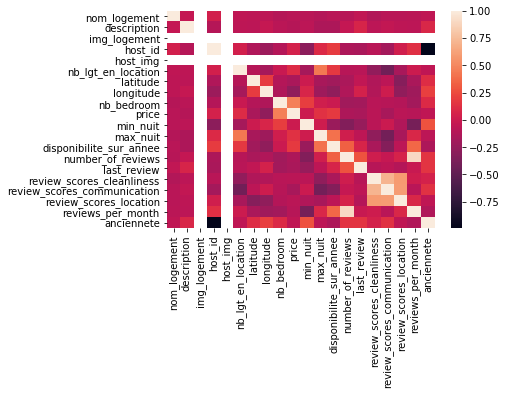

In [50]:
sns.heatmap(all_corr.corr());

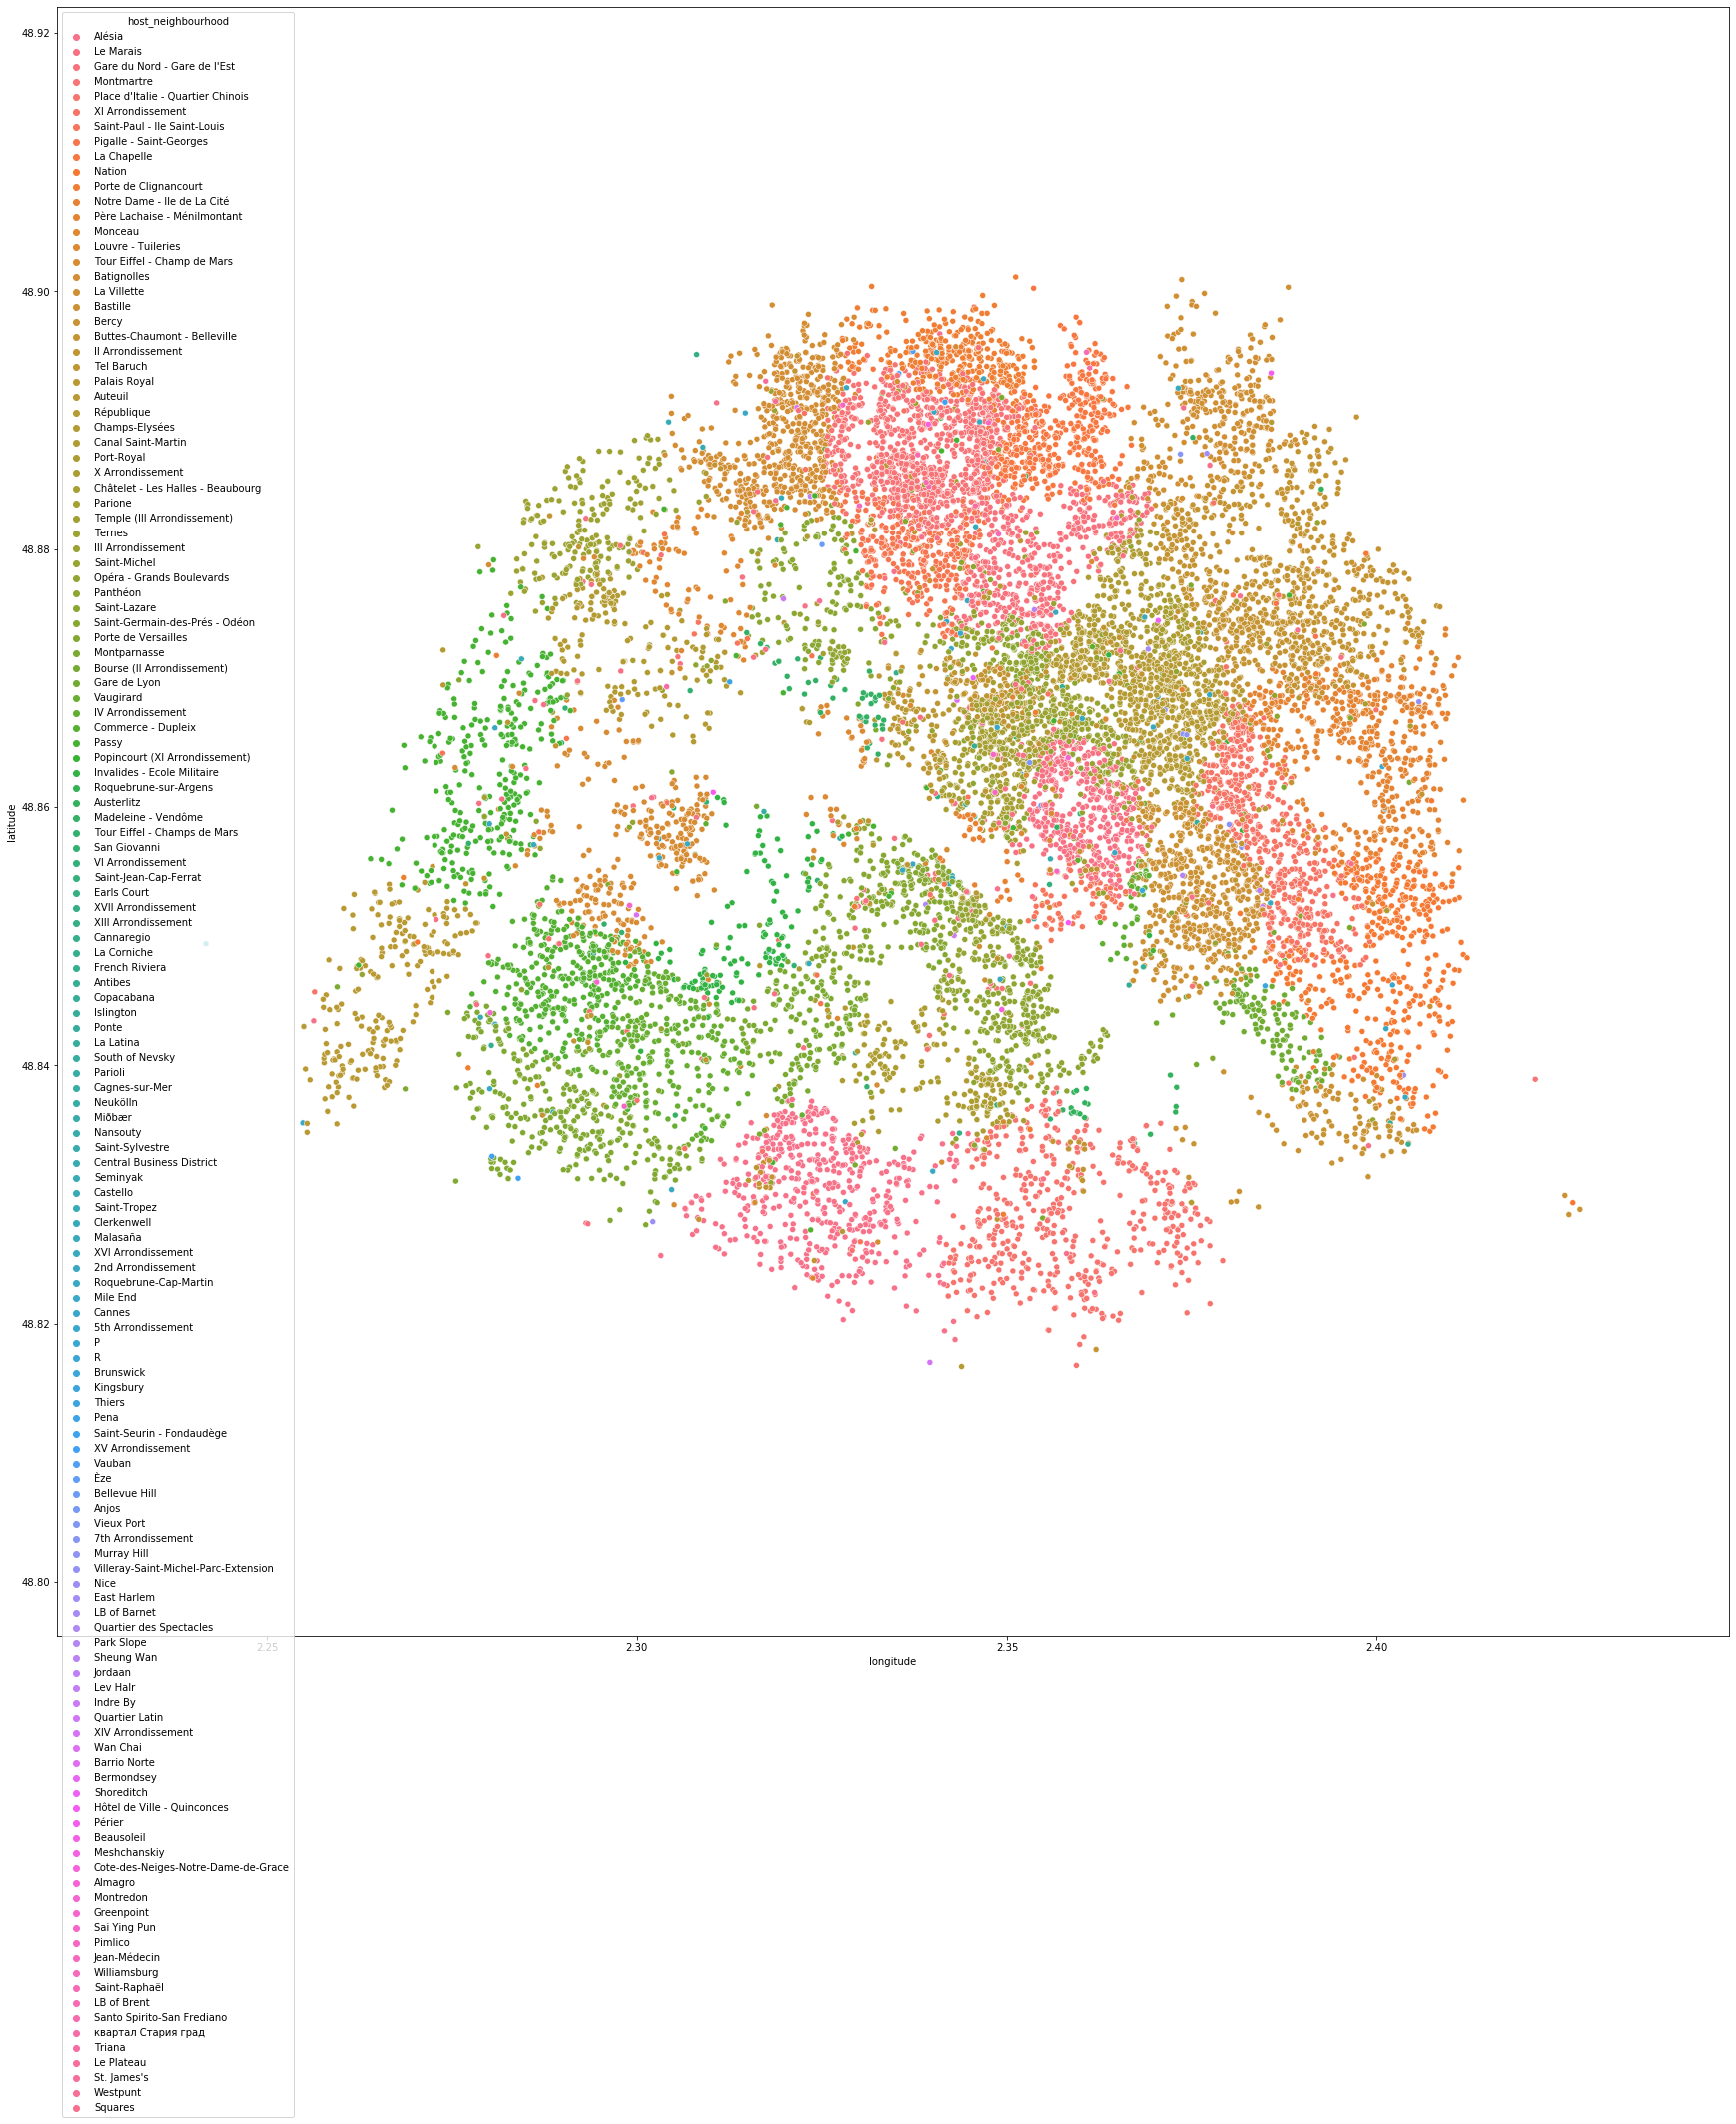

In [51]:
sns.scatterplot( data=listing_c, x='longitude', y='latitude', hue='host_neighbourhood')
fig = plt.gcf()
fig.set_size_inches(30,30)

In [52]:
listing_c.to_excel('listing_cleaned.xls', index=False)

In [53]:
listing_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15381 entries, 1 to 63079
Data columns (total 27 columns):
nom_logement                   15381 non-null bool
description                    15381 non-null bool
img_logement                   15381 non-null bool
host_id                        15381 non-null int64
host_residence                 15381 non-null object
superhost                      15381 non-null object
host_img                       15381 non-null bool
host_neighbourhood             15381 non-null object
nb_lgt_en_location             15381 non-null float64
host_has_profile_pic           15381 non-null object
host_identity_verified         15381 non-null object
latitude                       15381 non-null float64
longitude                      15381 non-null float64
property_type                  15381 non-null object
nb_bedroom                     15381 non-null float64
price                          15381 non-null float64
min_nuit                       15381 non-null f

In [56]:
review_c.to_csv('review_cleaned.csv', index=False)

In [55]:
voisin_c.to_excel('voisin_cleaned.xls', index=False)